In [3]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [4,4]
import sys
import os
scriptpath = 'your_own_path'
sys.path.append(os.path.abspath(scriptpath))


In [14]:
from halfsat import webSum_10x_halfSat, metrics, predictUMIs

In [5]:
web_summary_list = ['Brain_3p_web_summary.html',
                    'Brain_3p_LT_web_summary.html',
                    'Breast_Cancer_3p_LT_web_summary.html']
web_summary_arc = 'human_brain_3k_web_summary.html'
# generated from 10x's public 500_PBMC_3p_LT_Chromium_X dataset
metrics_summary_json = 'metrics_summary_json.json'

## Halfsat Curves

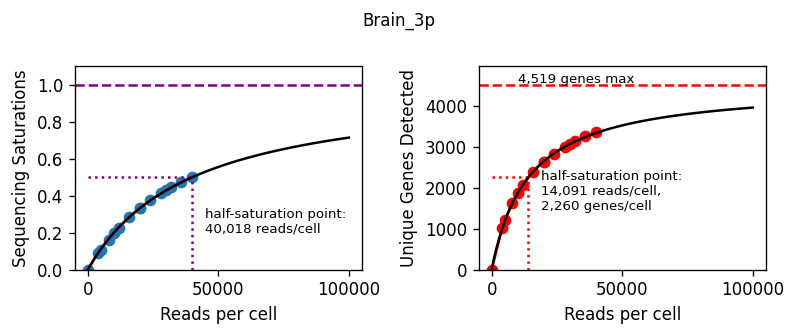


Sequencing saturation half-saturation point: 40,018 reads per cell
Current sequencing saturation level: 50.3%
Current reads per cell: 39,865
Current genes per cell: 3,358

Desired reads per cell: 80,000
Sequencing saturation for desired reads per cell: 66.7%
Uniques genes per cell for desired reads per cell: 3,842


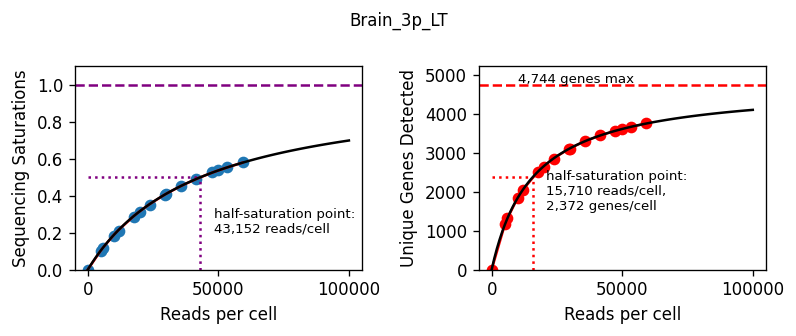


Sequencing saturation half-saturation point: 43,152 reads per cell
Current sequencing saturation level: 58.5%
Current reads per cell: 59,264
Current genes per cell: 3,764

Desired reads per cell: 80,000
Sequencing saturation for desired reads per cell: 65.0%
Uniques genes per cell for desired reads per cell: 3,965


In [6]:
webSum_10x_halfSat.satcurves(web_summary_list[0], readmax=100000, readsDesired=80000)
webSum_10x_halfSat.satcurves(web_summary_list[1], readmax=100000, readsDesired=80000)

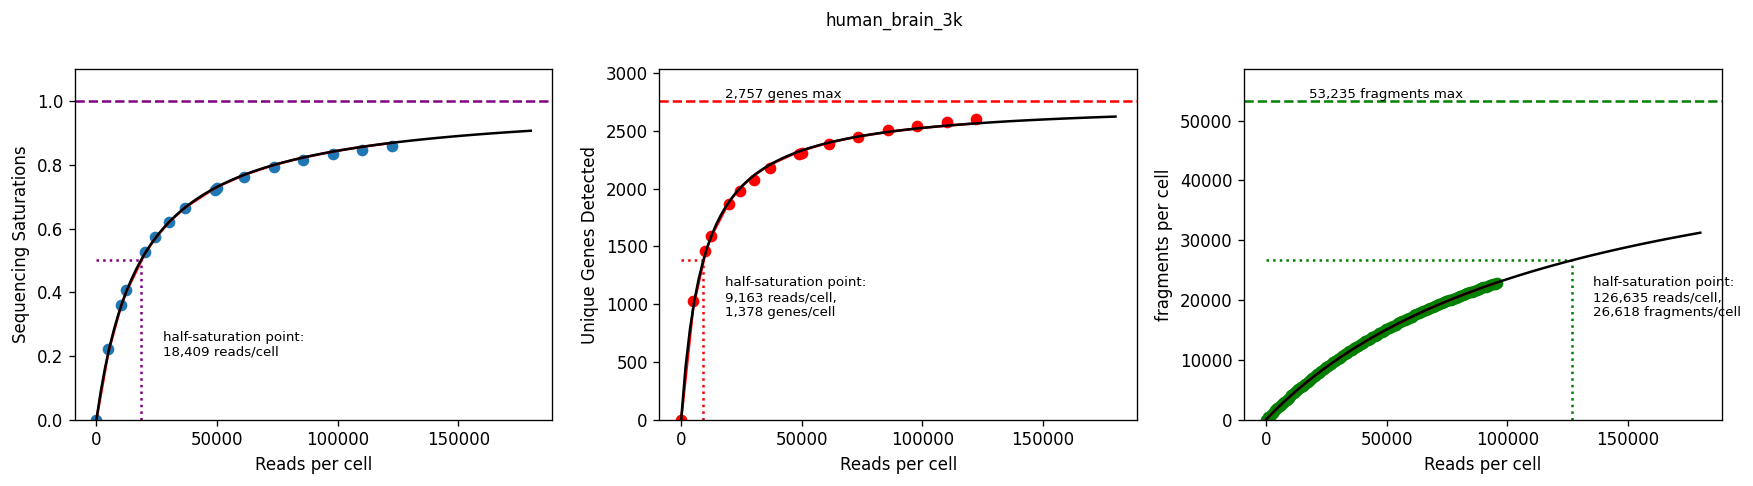


Sequencing saturation half-saturation point: 18,409 reads per cell
Current sequencing saturation level: 86.1%
Current reads per cell: 122,334.93
Current genes per cell: 2,600

Desired reads per cell: 100,000
Sequencing saturation for desired reads per cell: 84.5%
Uniques genes per cell for desired reads per cell: 2,526
Fragments per cell for desired reads per cell: 23,489


In [7]:
webSum_10x_halfSat.satcurves(web_summary_arc, webSummaryType='ARC', readmax=180000, readsDesired=100000)

In [19]:
help(predictUMIs.plotUMIcurve)

Help on function plotUMIcurve in module halfsat.predictUMIs:

plotUMIcurve(jsonPath, readmax=80000, readsDesired=40000)
    Plot Unique UMIs detected per cell versus reads per cell.
    
    Plot UMIs versus reads graph and provide dataframe with prediction of UMIs
    per cell given a specified number of reads.
    
    Args:
        jsonPath (string): path to metrics_summary_json.json file.
        readmax (int): length of the plot.
        readsDesired: number of reads to predict UMIs per cell.
    
    Returns:
        Pandas dataframe: Table with sample id, current metrics, and predicted UMIs.
    
    Raises:
        Exception: description



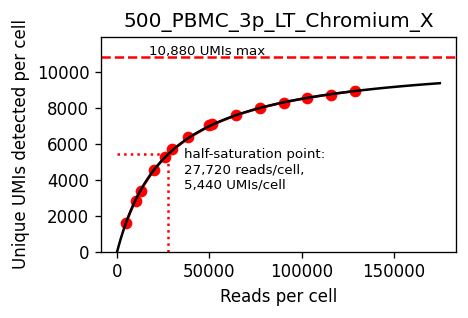

,sample_id,reads_per_cell,current_UMIs,predicted UMIs for 150000 reads per cell
0,500_PBMC_3p_LT_Chromium_X,128910.867121,8935.0,9183


In [21]:
predictUMIs.plotUMIcurve(metrics_summary_json, readmax=175000, readsDesired=150000)

## Metric Tables

In [8]:
# Full Table
metrics.tableGenerator(web_summary_list, 'GEX', 'full')

,Sample ID,Sample Description,Chemistry,Include introns,Reference Path,Transcriptome,Pipeline Version,Number of Reads,Number of Short Reads Skipped,Valid Barcodes,...,Estimated Number of Cells,Fraction Reads in Cells,Mean Reads per Cell,Median Genes per Cell,Total Genes Detected,Median UMI Counts per Cell,tso_frac,i1_bases_with_q30_frac,i2_bases_with_q30_frac,low_support_umi_reads_frac
0,Brain_3p,"Sorted nuclei from Human brain, 3’ v3.1",Single Cell 3' v3,True,/mnt/scratch2/cellranger-6.0.0/references/refd...,GRCh38-2020-A,cellranger-6.0.0,"263,425,246",0,96.7%,...,"6,608",91.9%,"39,865","3,358","31,287","8,066",0.144249,0.959889,0.941109,0.004700
1,Brain_3p_LT,"Sorted nuclei from Human brain, 3’ LT v3.1",Single Cell 3' v3 LT,True,/mnt/scratch2/cellranger-6.0.0/references/refd...,GRCh38-2020-A,cellranger-6.0.0,"37,099,167",0,96.1%,...,626,88.4%,"59,264","3,764","26,541","9,250",0.188941,0.944693,0.928160,0.005282
2,Breast_Cancer_3p_LT,Sorted cells from Human Invasive Ductal Carcin...,Single Cell 3' v3 LT,False,/mnt/scratch2/cellranger-6.0.0/references/refd...,GRCh38-2020-A,cellranger-6.0.0,"42,854,607",0,97.5%,...,687,91.8%,"62,379","3,023","21,667","14,292",0.089274,0.953108,0.936143,0.003269


In [9]:
# Full Table ARC
atacTable, gexTable = metrics.tableGenerator([web_summary_arc], webSummaryType='ARC', tableType='full')

In [10]:
atacTable

,Sample ID,Sample description,Pipeline version,Reference path,Chemistry,Organism,Include introns,Feature linkages detected,Linked genes,Linked peaks,...,Fraction of transposition events in peaks in cells,Median high-quality fragments per cell,Confidently mapped read pairs,Unmapped read pairs,Non-nuclear read pairs,Number of peaks,Fraction of genome in peaks,TSS enrichment score,Fraction of high-quality fragments overlapping TSS,Fraction of high-quality fragments overlapping peaks
0,human_brain_3k,Frozen human healthy brain tissue (3k),cellranger-arc-2.0.0,/mnt/scratch2/cellranger-arc-2.0.0/refdata-cel...,Single Cell Multiome ATAC + Gene Expression v1,Homo_sapiens,True,"847,025","13,629","88,843",...,35.3%,"22,881",91.2%,1.0%,1.3%,"134,030",3.7%,6.53,28.6%,38.8%


In [11]:
gexTable

,Sample ID,Sample description,Pipeline version,Reference path,Chemistry,Organism,Include introns,Feature linkages detected,Linked genes,Linked peaks,...,Median UMI counts per cell,Median genes per cell,Total genes detected,Reads mapped to genome,Reads mapped confidently to genome,Reads mapped confidently to intergenic regions,Reads mapped confidently to intronic regions,Reads mapped confidently to exonic regions,Reads mapped confidently to transcriptome,Reads mapped antisense to gene
0,human_brain_3k,Frozen human healthy brain tissue (3k),cellranger-arc-2.0.0,/mnt/scratch2/cellranger-arc-2.0.0/refdata-cel...,Single Cell Multiome ATAC + Gene Expression v1,Homo_sapiens,True,"847,025","13,629","88,843",...,"6,966","2,600","31,201",96.9%,92.2%,6.2%,65.4%,20.6%,73.9%,11.1%


In [12]:
# Delivery doc (abbreviated table)
metrics.tableGenerator(web_summary_list, 'GEX', 'delivery doc')

,Sample ID,Number of Reads,Sequencing Saturation,Reads Mapped to Genome,Reads Mapped Confidently to Genome,Estimated Number of Cells,Fraction Reads in Cells,Mean Reads per Cell,Median Genes per Cell,Median UMI Counts per Cell,tso_frac
0,Brain_3p,"263,425,246",50.3%,96.7%,92.7%,"6,608",91.9%,"39,865","3,358","8,066",0.144249
1,Brain_3p_LT,"37,099,167",58.5%,95.9%,91.5%,626,88.4%,"59,264","3,764","9,250",0.188941
2,Breast_Cancer_3p_LT,"42,854,607",32.8%,96.6%,93.2%,687,91.8%,"62,379","3,023","14,292",0.089274


In [13]:
# repooling table
metrics.tableGenerator(web_summary_list, 'GEX', 'repooling', readsDesired = 80000)

,sample id,number of reads,estimated number of cells,mean reads per cell,reads needed for 80000 reads per cell,total reads needed for 80000 reads per cell,percent of lane
0,Brain_3p,263425246,6608,39865,40135,265212080,0.913584
1,Brain_3p_LT,37099167,626,59264,20736,12980736,0.044715
2,Breast_Cancer_3p_LT,42854607,687,62379,17621,12105627,0.041701
